# Titanic Dataset

In [1]:
# ignore warnings
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import matplotlib.pyplot as plt
import seaborn as sns

# matplotlib의 기본 scheme이 아닌 seaborn scheme setting
plt.style.use('seaborn')
sns.set(font_scale=1.0)  # graph font size

# 결측치 시각화 library
import missingno as msno

%matplotlib inline

colors = ['#8fd9b6', '#ff9999', '#D4AFB9', '#D1CFE2', '#9CADCE', '#7EC4CF', '#52B2CF']

# EDA

1. Dataset 확인 (null)
2. 탐색적 데이터 분석 EDA (feature 분석, feature 간 상관관계, 시각화 -> insight)
3. feature engineering (모델 성능 향상을 위한 one-hot encoding, 범주화, 텍스트 데이터 처리 등)
4. model 생성 (sklearn, 딥러닝 - tensorflow, pytorch)
5. model 학습 및 예측 (trainset, testset)
6. model evaluation

### 1. Dataset 확인

- 예측값 : Survived

In [2]:
train = pd.read_csv('../datasets_for_practice/kaggle/titanic/train.csv')
test = pd.read_csv('../datasets_for_practice/kaggle/titanic/test.csv')

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### 1.1 Null Check

- 'Cabin' 컬럼은 NaN 비중이 80% 가까이 되니 모델링에서 제외하는 게 좋음
- print option - :> 오른쪽 정렬 :< 왼쪽정렬

In [5]:
print('Train dataset')
for col in train.columns:
    print('{:<12}\t Percent of NaN value : {:.2f}'.format(col, 100 * train[col].isnull().sum()/train.shape[0]))

print('\nTest dataset')
for col in test.columns:
    print('{:<12}\t Percent of Nan value : {:.2f}'.format(col, 100 * test[col].isnull().sum()/test.shape[0]))

Train dataset
PassengerId 	 Percent of NaN value : 0.00
Survived    	 Percent of NaN value : 0.00
Pclass      	 Percent of NaN value : 0.00
Name        	 Percent of NaN value : 0.00
Sex         	 Percent of NaN value : 0.00
Age         	 Percent of NaN value : 19.87
SibSp       	 Percent of NaN value : 0.00
Parch       	 Percent of NaN value : 0.00
Ticket      	 Percent of NaN value : 0.00
Fare        	 Percent of NaN value : 0.00
Cabin       	 Percent of NaN value : 77.10
Embarked    	 Percent of NaN value : 0.22

Test dataset
PassengerId 	 Percent of Nan value : 0.00
Pclass      	 Percent of Nan value : 0.00
Name        	 Percent of Nan value : 0.00
Sex         	 Percent of Nan value : 0.00
Age         	 Percent of Nan value : 20.57
SibSp       	 Percent of Nan value : 0.00
Parch       	 Percent of Nan value : 0.00
Ticket      	 Percent of Nan value : 0.00
Fare        	 Percent of Nan value : 0.24
Cabin       	 Percent of Nan value : 78.23
Embarked    	 Percent of Nan value : 0.00


### Null 데이터 시각화

missingno
- https://coderzcolumn.com/tutorials/data-science/missingno-visualize-missing-data-in-python
- msno.matrix : 결측치를 matrix로 시각화 (color : RGB)
- msno.bar : 결측치를 bar 그래프로 시각화 (color : RGB)

Text(0.5, 1.0, 'Test')

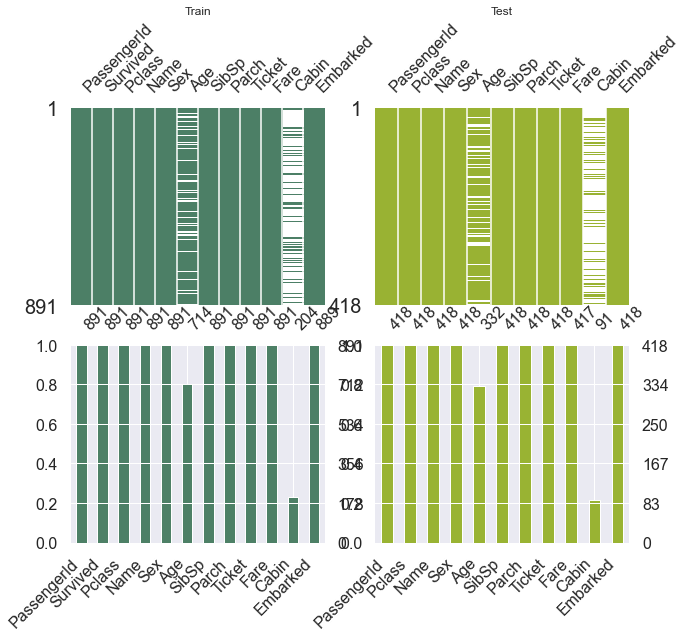

In [6]:
f, ax = plt.subplots(2, 2, figsize=(10, 8))

msno.matrix(df=train, color=(0.3, 0.5, 0.4), ax=ax[0,0])
msno.matrix(df=test, color=(0.6, 0.7, 0.2), ax=ax[0,1])
msno.bar(df=train, color=(0.3, 0.5, 0.4), ax=ax[1,0])
msno.bar(df=test, color=(0.6, 0.7, 0.2), ax=ax[1,1])
ax[0,0].set_title('Train')
ax[0,1].set_title('Test')

### 1.2 Target 확인

- binary classification에서 0과 1의 분포 사전에 확인 필요
- 결과에 따라 모델 평가 방법이 달라질 수 있음

<b>subplots</b>

- subplot 간격 조정 : subplots_adjust(left, bottom, right, top, wspace, hspace)

<b>plot.pie</b>
https://wikidocs.net/92114
- explode : 부채꼴이 파이 차트의 중심에서 벗어나는 정도
- autopct : 부채꼴 안에 표시될 숫자의 형식 지정
- shadow : 파이 차트 그림자 표시 여부

<b>sns.countplot</br>
https://seaborn.pydata.org/generated/seaborn.countplot.html
- Show the counts of observations in each categorical bin using bars.
- palette : 색 설정
- hue='Survived' : 'Survived' 컬럼 범주(0, 1)에 막대를 나누고, 서로 다른 색 설정

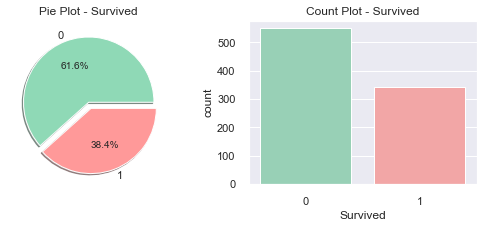

In [7]:
f, ax = plt.subplots(1, 2, figsize=(9,3))

train['Survived'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True, colors=colors)
ax[0].set_title('Pie Plot - Survived')
ax[0].set_ylabel('')

sns.countplot('Survived', data=train, ax=ax[1], palette=colors)
ax[1].set_title('Count Plot - Survived')

plt.show()

## 2. Exploratory Data Analysis

- 시각화 library : matplotlib, seaborn, plotly 등

### 2.1 Pclass

- ordinal (서수형) 데이터 : 카테고리 + 순서
- Pclass에 따른 생존율 차이 확인 (엑셀 pivot과 유사)

<b>groupby</b>
- as_index=True : 그룹 라벨을 index로 사용
- count() : 전체 개수
- sum() : 'Survived=1'인 사람 총 합
- mean() : 평균 생존율

In [8]:
c = train[['Survived', 'Pclass']].groupby(['Pclass'], as_index=True).count()
s = train[['Survived', 'Pclass']].groupby(['Pclass'], as_index=True).sum()
m = train[['Survived', 'Pclass']].groupby(['Pclass'], as_index=True).mean()

pd.concat([c, s, m], axis=1, keys=['count', 'sum', 'mean'])

,count,sum,mean
,Survived,Survived,Survived
Pclass,,,
1,216,136,0.629630
2,184,87,0.472826
3,491,119,0.242363


<b>pandas의 crosstab 사용하기</b>
- margins=True : 각 행과 열의 총합 보여주기

In [9]:
pd.crosstab(train['Pclass'], train['Survived'], margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


- Pclass가 좋을수록 생존율이 높음
- 생존에 Pclass 영향이 크며, 이후 모델 생성 시 이 feature를 사용하는 것이 좋을 것이라고 판단할 수 있음

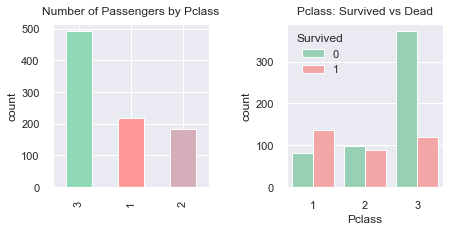

In [10]:
y_position=1.02
f, ax = plt.subplots(1, 2, figsize=(7,3))

train['Pclass'].value_counts().plot.bar(color=colors, ax=ax[0])
ax[0].set_title('Number of Passengers by Pclass', y=y_position)
ax[0].set_ylabel('count')

sns.countplot('Pclass', hue='Survived', data=train, palette=colors, ax=ax[1])
ax[1].set_title('Pclass: Survived vs Dead', y=y_position)

plt.subplots_adjust(wspace=0.5)
plt.show()

subplot 함수

In [11]:
def drawSubplot(col, sort=False):
    y_position=1.02
    f, ax = plt.subplots(1, 3, figsize=(12,3))
    
    train[col].value_counts().plot.bar(color=colors, ax=ax[0])
    ax[0].set_title('Number of Passengers by {}'.format(col), y=y_position)
    ax[0].set_ylabel('count')
    
    if sort == True:
        train[[col, 'Survived']].groupby([col], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar(color=colors, ax=ax[1])
        ax[1].set_title('Survived vs {}'.format(col))
        ax[1].set_ylabel('rate')
    else:
        train[[col, 'Survived']].groupby([col], as_index=True).mean().plot.bar(color=colors, ax=ax[1])
        ax[1].set_title('Survived vs {}'.format(col))
        ax[1].set_ylabel('rate')
    
    sns.countplot(col, hue='Survived', data=train, palette=colors, ax=ax[2])
    ax[2].set_title('{}: Survived vs Dead'.format(col), y=y_position)
    
    plt.subplots_adjust(wspace=0.5)
    plt.show()

### 2.2 Sex

- 성별에 따른 생존율 차이 확인

In [12]:
pd.crosstab(train['Sex'], train['Survived'], margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


- 여성의 생존율이 더 높음
- 생존에 Sex 영향이 크며, 이후 모델 생성 시 이 feature를 사용하는 것이 좋을 것이라고 판단할 수 있음

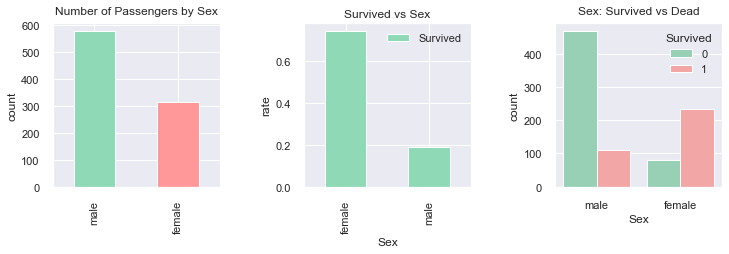

In [13]:
drawSubplot('Sex')

### 2.3 Pclass and Sex

<b>seaborn factorplot</b>
- 3차원 그래프
- aspect : 높이는 고정한 상태에서 너비 비율 조정

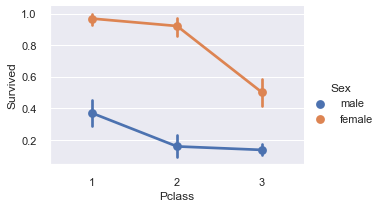

In [14]:
sns.factorplot('Pclass', 'Survived', hue='Sex', data=train, size=3, aspect=1.5)

- 모든 class에서 female의 생존율이 높음
- 성별과 상관없이 class가 높을수록 생존율이 높음

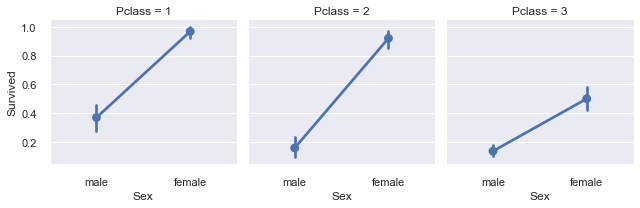

In [15]:
sns.factorplot('Sex', 'Survived', col='Pclass', data=train, size=3, aspect=1)

### 2.4 Age

In [16]:
print("제일 나이 많은 탑승객 : {:.1f} Years".format(train['Age'].max()))
print("제일 나이 어린 탑승객 : {:.1f} Years".format(train['Age'].min()))
print("탑승객 평균 나이      : {:.1f} Years".format(train['Age'].mean()))

제일 나이 많은 탑승객 : 80.0 Years
제일 나이 어린 탑승객 : 0.4 Years
탑승객 평균 나이      : 29.7 Years


생존에 따른 Age histogram
- 나이가 어린 생존자가 많음
- Class가 높을수록 나이 많은 사람의 비중이 커짐

<b>kdeplot</b>
- 커널밀도추정 그래프 (Kernel Density Estimator)
- 히스토그램 같은 분포를 스무딩해서 곡선으로 그려주는 것

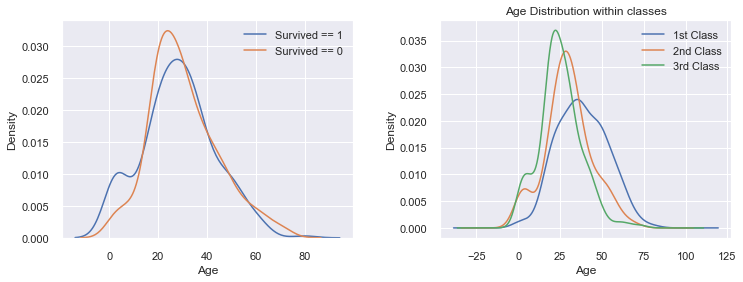

In [17]:
fig, ax = plt.subplots(1,2, figsize=(12,4))

sns.kdeplot(train[train['Survived'] == 1]['Age'], ax=ax[0])
sns.kdeplot(train[train['Survived'] == 0]['Age'], ax=ax[0])
ax[0].legend(['Survived == 1', 'Survived == 0'])

train['Age'][train['Pclass'] == 1].plot(kind='kde', ax=ax[1])
train['Age'][train['Pclass'] == 2].plot(kind='kde', ax=ax[1])
train['Age'][train['Pclass'] == 3].plot(kind='kde', ax=ax[1])
ax[1].set_xlabel('Age')
ax[1].set_title('Age Distribution within classes')
ax[1].legend(['1st Class', '2nd Class', '3rd Class'])

plt.subplots_adjust(wspace=0.3)
plt.show()

연령 * 생존율
- 나이가 어릴수록 생존율이 높음
- 생존에 Age 영향이 크며, 이후 모델 생성 시 이 feature를 사용하는 것이 좋을 것이라고 판단할 수 있음

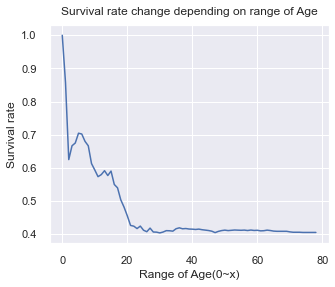

In [18]:
cummulate_survival_rate = []

for i in range(1, int(train['Age'].max())):
    cummulate_survival_rate.append(train[train['Age'] < i]['Survived'].sum() / len(train[train['Age'] < i]))

plt.figure(figsize=(5,4))
plt.plot(cummulate_survival_rate)
plt.title('Survival rate change depending on range of Age', y=1.02)
plt.xlabel('Range of Age(0~x)')
plt.ylabel('Survival rate')
plt.show()

### 2.5 Pclass, Sex, Age

<b>seaborn violinplot</b>
- x축 : 명목형 변수 (Pclass, Sex)
- y축 : 수치형 변수의 distribution (Age)

- 모든 class에서 어릴수록 생존율 높음
- 여성의 생존율 높음

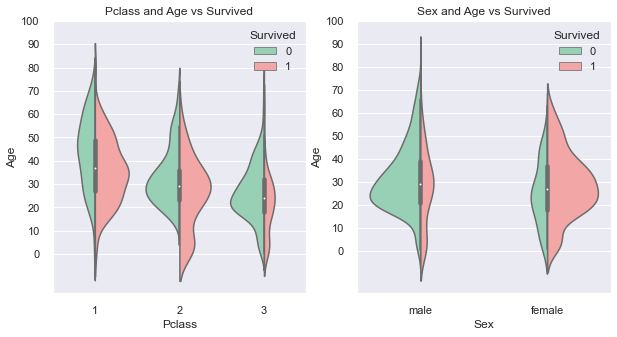

In [19]:
f, ax = plt.subplots(1, 2, figsize=(10, 5))

sns.violinplot('Pclass', 'Age', hue='Survived', data=train, scale='count', split=True, ax=ax[0], palette=colors)
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0, 110, 10))
sns.violinplot('Sex', 'Age', hue='Survived', data=train, scale='count', split=True, ax=ax[1], palette=colors)
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0, 110, 10))
plt.show()

### 2.6 Embarked

- 탑승 항구 'C'의 생존율이 가장 높음

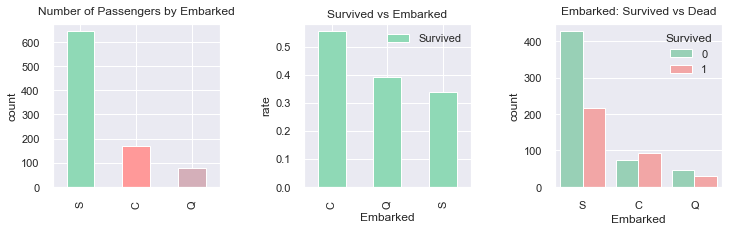

In [20]:
drawSubplot('Embarked', True)

- (1) 'S'에서 가장 많은 사람 탑승
- (2) 'S'의 남성 비율이 높음
- (3) 'S'의 생존율이 매우 낮음
- (4) 'S'에서 3rd Class 고객이 많이 탑승함

Text(0.5, 1.0, '(4) Embarked vs Pclass')

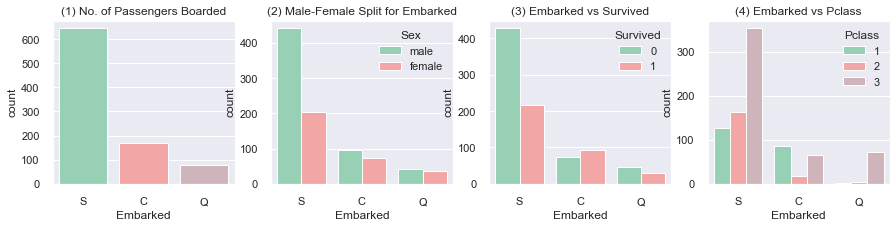

In [21]:
f, ax = plt.subplots(1, 4, figsize=(15, 3))
sns.countplot('Embarked', data=train, ax=ax[0], palette=colors)
sns.countplot('Embarked', hue='Sex', data=train, ax=ax[1], palette=colors)
sns.countplot('Embarked', hue='Survived', data=train, ax=ax[2], palette=colors)
sns.countplot('Embarked', hue='Pclass', data=train, ax=ax[3], palette=colors)
ax[0].set_title('(1) No. of Passengers Boarded')
ax[1].set_title('(2) Male-Female Split for Embarked')
ax[2].set_title('(3) Embarked vs Survived')
ax[3].set_title('(4) Embarked vs Pclass')

### 2.7 Family

- SibSp (형제/자매) + Parch(부모/자녀) + 1(본인)

In [22]:
train['FamilySize'] = train['SibSp'] + train['Parch'] + 1
test['FamilySize'] = test['SibSp'] + test['Parch'] + 1

print("Maximum size of Family : {}".format(train['FamilySize'].max()))
print("Minimum size of Family : {}".format(train['FamilySize'].min()))

Maximum size of Family : 11
Minimum size of Family : 1


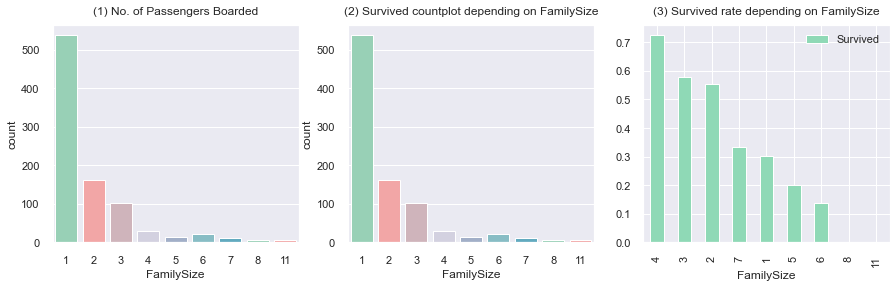

In [23]:
f, ax = plt.subplots(1, 3, figsize=(15, 4))
sns.countplot('FamilySize', data=train, ax=ax[0], palette=colors)
sns.countplot('FamilySize', data=train, ax=ax[1], palette=colors)
train[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax[2], color=colors)

ax[0].set_title('(1) No. of Passengers Boarded', y=1.02)
ax[1].set_title('(2) Survived countplot depending on FamilySize', y=1.02)
ax[2].set_title('(3) Survived rate depending on FamilySize', y=1.02)

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

### 2.8 Fare

- 탑승 요금
- continuous feature

Histogram : Distribution Plot
- https://seaborn.pydata.org/generated/seaborn.distplot.html
- label : Legend label for the relevant component of the plot.

- 비대칭 그래프 (high skewness)
- 해당 데이터 학습 시 모델이 outlier에 민감하게 반응해서 성능이 떨어질 수 있음
- outlier의 영향을 줄이기 위해 'Fare' 데이터에 'log' 적용
- cf) 이 부분은 사실 feature engineering (모델의 성능 향상을 위해 feature를 조작하거나, 새로운 feature 추가하는 작업)

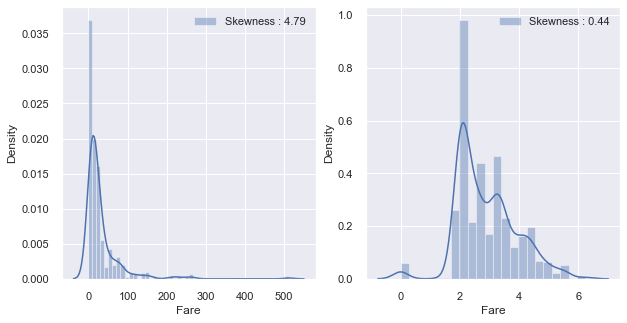

In [24]:
f, ax = plt.subplots(1, 2, figsize=(10, 5))

sns.distplot(train['Fare'], color='b', label='Skewness : {:.2f}'.format(train['Fare'].skew()), ax=ax[0])
ax[0].legend(loc='best')   # label 위치

# Null 값 -> mean 대체
test.loc[train.Fare.isnull(), 'Fare'] = test['Fare'].mean()

# log 적용
train['Fare'] = train['Fare'].map(lambda i : np.log(i) if i > 0 else 0)
test['Fare'] = test['Fare'].map(lambda i : np.log(i) if i > 0 else 0)

sns.distplot(train['Fare'], color='b', label='Skewness : {:.2f}'.format(train['Fare'].skew()), ax=ax[1])
ax[1].legend(loc='best')   # label 위치

### 2.9 Ticket

- 값이 매우 다양한 범주형 변수 (string)

In [25]:
train['Ticket'].value_counts()

347082                7
CA. 2343              7
1601                  7
3101295               6
CA 2144               6
347088                6
S.O.C. 14879          5
382652                5
LINE                  4
PC 17757              4
17421                 4
349909                4
113760                4
4133                  4
113781                4
W./C. 6608            4
2666                  4
19950                 4
347077                4
C.A. 31921            3
PC 17572              3
C.A. 34651            3
363291                3
F.C.C. 13529          3
345773                3
248727                3
24160                 3
29106                 3
SC/Paris 2123         3
35273                 3
371110                3
230080                3
PC 17760              3
239853                3
PC 17582              3
347742                3
110152                3
13502                 3
110413                3
PC 17755              3
PC 17558              2
237736          